In [ ]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
def euclidean_distance(x1,x2):
  #Esta función calcula la distancia euclidiana usando numpy.
  return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
#Ejemplo de distancia euclidiana.
var1 = np.array([12,14])
var2 = np.array([0,0])
euclidean_distance(var1,var2)

18.439088914585774

In [ ]:
X_train = np.array([[2,0],[4,0],[5,7],[10,10],[1,1],[5,10],[8,24]])
y_train = np.array([0, 0, 1, 0, 1, 0, 1])

In [ ]:
def k_nearest_neighbors(X_train, y_train, X_test, k):
  #Lista para almacenar las clases asignadas
  y_pred = []

  #Iterar sobre cada punto de prueba.
  for i in range(len(X_test)):
    #Calcular la distancia entre el punto de prueba y todos los puntos de entrenamiento.
    distances = [euclidean_distance(X_test[i], x_var) for x_var in X_train]

    #Selecionar los K puntos más cercanos.
    K_indices = np.argsort(distances)[:k]

    #Asignar las clas más frecuente entre los K vecinos más cercanos al punto de prueba.
    k_nearest_classes = [y_train[idx] for idx in K_indices]
    """la función most_common(n) devuelve un lista de tuplas con los valores n más comunes
    en este caso queremos solo el más común por eso elegimos 1, el caso de 0 devuleve una lista vacia
    el caso 2 los primeros dos más comunes"""
    most_common_class = Counter(k_nearest_classes).most_common(1)

    #Asignamos la clase asignada al punto de prueba.
    y_pred.append(most_common_class[0][0])
  return y_pred

In [ ]:
X_test = np.array([[10,12]])

In [ ]:
#Prueba
X_space = np.array([[i, j] for i in np.linspace(-10, 10, 100) for j in np.linspace(-10, 10, 100)])
X_train = X_space[np.random.choice( X_space.shape[0],100, replace=False )]
y_train = np.array(np.random.randint(3,size=100))
#----------------------------------------------------------------
X_test = np.array([[2, 2], [7, 9], [0, 0], [10, 10]])
#y_pred = k_nearest_neighbors(X_train, y_train, X_test, k=3)
#y_pred

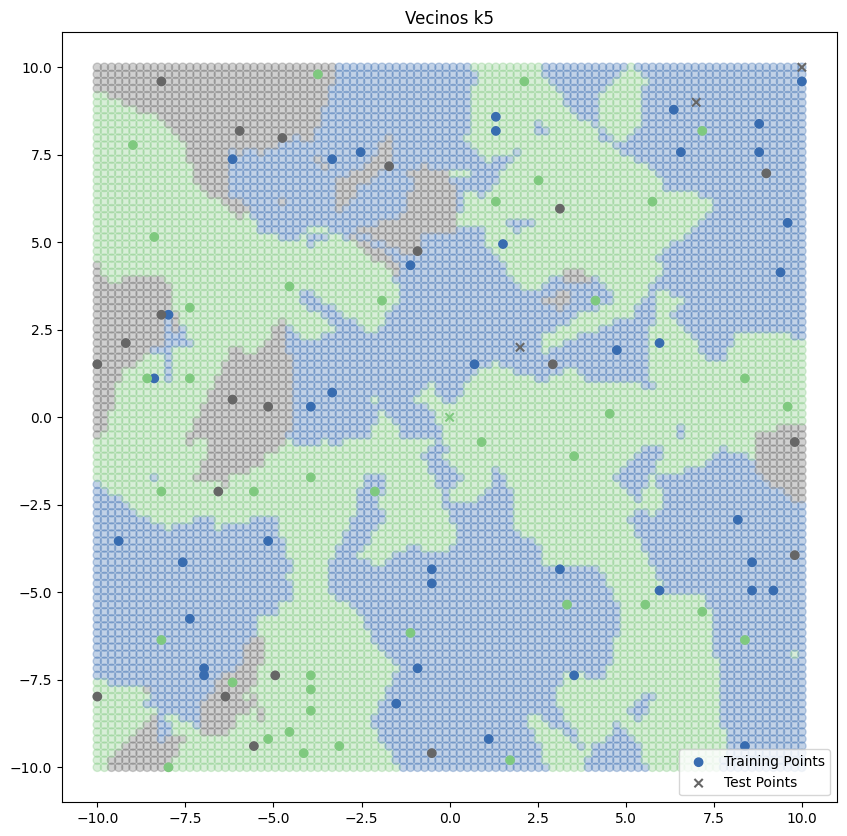

In [ ]:
#Generamos la grafica de K-NN
plt.figure(figsize=(10,10),dpi=100)
n_vec = 5
#Predecir clases para cada punto en X_space
y_space_pred = k_nearest_neighbors(X_train, y_train, X_space, k=n_vec)

# Graficar los puntos de X_space en diferentes colores según su clase asignada
plt.scatter(X_space[:, 0], X_space[:, 1], c=y_space_pred, cmap='Accent', alpha=.3) #label='Predicted Classes'

#Se predice el conjunto de prueba
y_test = k_nearest_neighbors(X_train, y_train, X_test, k=n_vec)

# Graficar los puntos de entrenamiento y los puntos de prueba en diferentes colores
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Accent', label='Training Points')
#Conjunto de prueba
plt.scatter(X_test[:, 0], X_test[:, 1],marker='x', c=y_test,cmap='Accent', label='Test Points')
plt.title(f'Vecinos k{n_vec}')
plt.legend()
plt.show()